In [0]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dropout, BatchNormalization

In [0]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] ## dataset category
(X_train, Y_train_x), (X_test, Y_test_x) = datasets.cifar10.load_data() ## load dataset

X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [0]:
X_train[0].shape

(32, 32, 3)

In [0]:
Y_train_x[0].squeeze() ## remove dim = 1
Y_train = to_categorical(Y_train_x, 10)
Y_test = to_categorical(Y_test_x, 10)

(-0.5, 31.5, 31.5, -0.5)

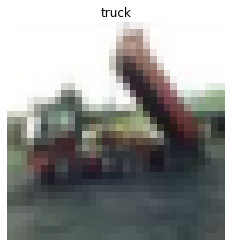

In [0]:
plt.imshow(X_train[2])
plt.title(name_list[Y_train_x[2].squeeze()])
plt.axis("off")

In [0]:
## VGG16
VGG_model = VGG16(include_top=False, input_shape=(32, 32, 3)) ## include_top = False remove classifier part of the network

In [0]:
VGG_model.layers.pop(-1) ##remove maxpolling, instead, using GlobalAveragePooling

In [0]:
## Our network

GlobalAverage = [GlobalAveragePooling2D()]

FC_layers = [Dense(units=128, activation='relu'),
             Dense(units=64, activation='relu'),
             BatchNormalization(),
             Dense(units=10, activation='softmax')]


## freeze VGG weights
for layers in VGG_model.layers:
  layers.trainable = False

In [0]:
Our_model = Sequential(VGG_model.layers + GlobalAverage + FC_layers)
Our_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)        

In [0]:
Our_model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['categorical_accuracy'])
Our_model.fit( X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))


Epoch 1/10
321/391 [=======================>......] - ETA: 1:30 - loss: 1.2769 - categorical_accuracy: 0.5541

In [0]:
## fine-tune VGG weights
for layers in VGG_model.layers:
  layers.trainable = True
Our_model_tune = Sequential(VGG_model.layers + GlobalAverage + FC_layers)
Our_model_tune.summary()

In [0]:
Our_model_tune.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['categorical_accuracy'])
Our_model_tune.fit( X_train, Y_train, batch_size=256, epochs=16, validation_data=(X_test, Y_test) )